<a href="https://colab.research.google.com/github/woojinhong03/My_study_in_2022_python/blob/main/spaceship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

data = pd.read_csv("/content/drive/MyDrive/Kaggle Study/spaceship/train.csv")
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


* PassengerId - 각 승객의 고유 ID (gggg_pp - gggg:그룹, pp:그룹 내 번호) 
* HomePlanet - 승객이 출발한 행성 (일반적으로 거주하는 행성)
* Cryosleep - 극저온 수면 선택 여부
* Cabin - 객실 번호 (좌현 P, 우현 S)
* Destination - 승객이 내릴 행성
* Age - 승객의 나이
* VIP - 항해중 특별 서비스를 주문했는지 여부
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - 편의시설 청구 금액
* Name - 승객의 성과 이름
* Transported - 예측값, 승객이 다른 차원으로 운송되었는지 여부

In [24]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [25]:
data = data.dropna(axis=0)
data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [26]:
data.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True
11,0008_03,Europa,False,B/1/P,55 Cancri e,45.0,False,39.0,7295.0,589.0,110.0,124.0,Wezena Flatic,True


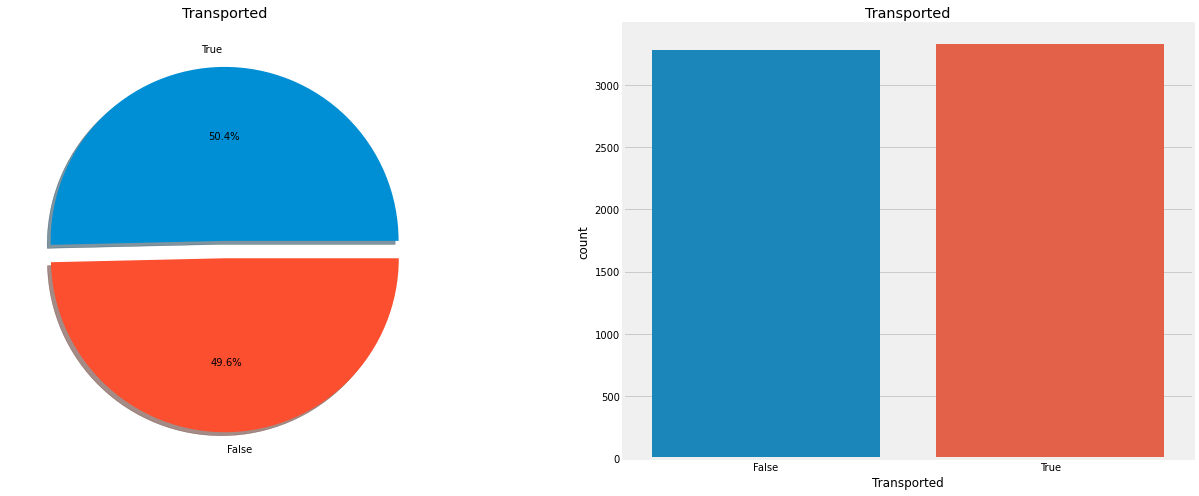

In [27]:
f,ax = plt.subplots(1,2,figsize=(20,8))
data['Transported'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Transported')
ax[0].set_ylabel('')
#print(ax[1])
sns.countplot('Transported',data=data,ax=ax[1])
ax[1].set_title('Transported')
plt.show()

In [28]:
data2 = pd.DataFrame(data.PassengerId.str.split('_',1).tolist(), columns = ['GroupId','NumId'])
data = pd.concat([data, data2], axis=1)
data.drop(["PassengerId"], axis=1)
data.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,NumId
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,0005,01
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,0006,01
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0007,01
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True,0008,01
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,0008,03


In [29]:
data["CryoSleep"].replace([False,True],[0,1],inplace=True)
data["CryoSleep"]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8688    0.0
8689    1.0
8690    0.0
8691    0.0
8692    0.0
Name: CryoSleep, Length: 8213, dtype: float64

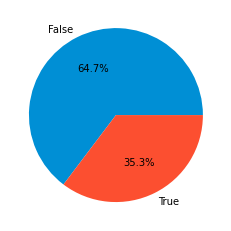

In [30]:
sleep_pi = [len(data[data['CryoSleep'] == 0]), len(data[data['CryoSleep'] == 1])]
sleep_pi_la = ['False','True']
plt.pie(sleep_pi, labels=sleep_pi_la, autopct='%.1f%%')
plt.show()

In [31]:
data["Transported"].replace([False,True],[0,1],inplace=True)
data["Transported"]

0       0.0
1       1.0
2       0.0
3       0.0
4       1.0
       ... 
8688    0.0
8689    0.0
8690    1.0
8691    0.0
8692    1.0
Name: Transported, Length: 8213, dtype: float64

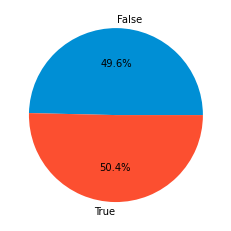

In [32]:
tp_pi = [len(data[data['Transported'] == 0]), len(data[data['Transported'] == 1])]
tp_pi_la = ['False','True']
plt.pie(tp_pi, labels=tp_pi_la, autopct='%.1f%%')
plt.show()

In [33]:
data["VIP"].replace([False,True],[0,1],inplace=True)
data["VIP"]

0       0.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
8688    1.0
8689    0.0
8690    0.0
8691    0.0
8692    0.0
Name: VIP, Length: 8213, dtype: float64

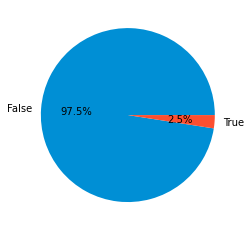

In [34]:
VIP_pi = [len(data[data['VIP'] == 0]), len(data[data['VIP'] == 1])]
VIP_pi_la = ['False','True']
plt.pie(VIP_pi, labels=VIP_pi_la, autopct='%.1f%%')
plt.show()

In [35]:
data.isnull().sum()

PassengerId     1607
HomePlanet      1607
CryoSleep       1607
Cabin           1607
Destination     1607
Age             1607
VIP             1607
RoomService     1607
FoodCourt       1607
ShoppingMall    1607
Spa             1607
VRDeck          1607
Name            1607
Transported     1607
GroupId         1607
NumId           1607
dtype: int64

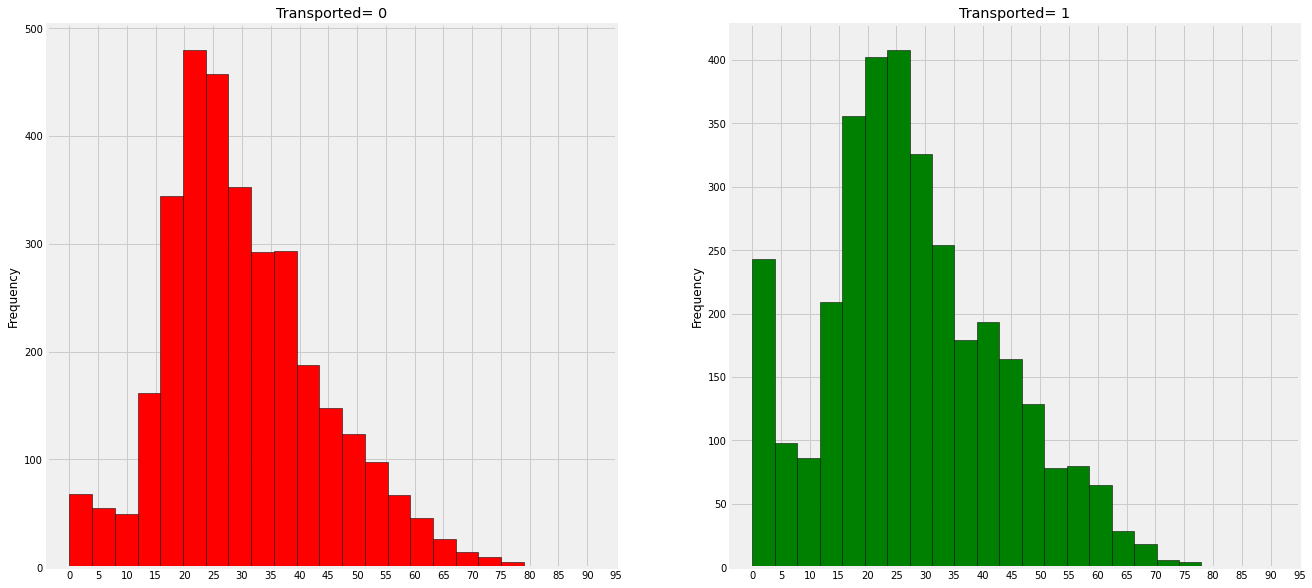

In [36]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Transported']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Transported= 0')
x1=list(range(0,100,5))
ax[0].set_xticks(x1)
data[data['Transported']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Transported= 1')
x2=list(range(0,100,5))
ax[1].set_xticks(x2)
plt.show()

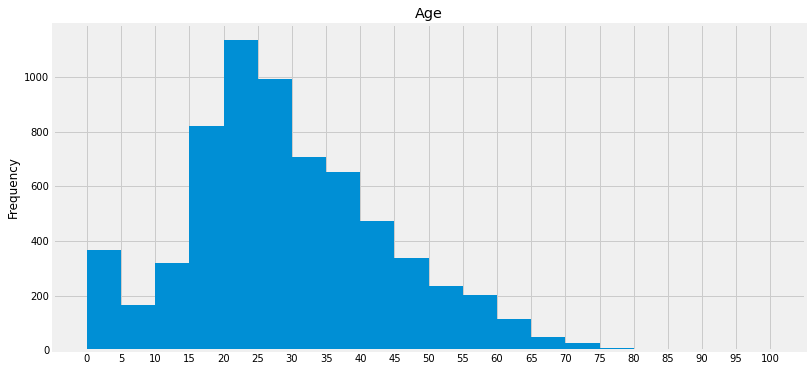

In [37]:
data["Age"].plot.hist(bins=range(0,101,5),figsize=[12,6])
plt.xticks(range(0,101,5))
plt.title("Age")
plt.show()

In [38]:
data['Age_band']=0
data.loc[data['Age']<=9,'Age_band']=0
data.loc[(data['Age']>9)&(data['Age']<=19),'Age_band']=1
data.loc[(data['Age']>19)&(data['Age']<=29),'Age_band']=2
data.loc[(data['Age']>29)&(data['Age']<=39),'Age_band']=3
data.loc[(data['Age']>39)&(data['Age']<=49),'Age_band']=4
data.loc[(data['Age']>49)&(data['Age']<=59),'Age_band']=5
data.loc[(data['Age']>59)&(data['Age']<=69),'Age_band']=6
data.loc[data['Age']>69,'Age_band']=7
data.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,NumId,Age_band
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,0001,01,3
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,0002,01,2


In [39]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
0,2139
2,2131
3,1358
1,1138
4,812
5,438
6,161
7,36


In [40]:
age0 = len(data[data['Age_band'] == 0]) / data['Age_band'].count()
age1 = len(data[data['Age_band'] == 1]) / data['Age_band'].count()
age2 = len(data[data['Age_band'] == 2]) / data['Age_band'].count()
age3 = len(data[data['Age_band'] == 3]) / data['Age_band'].count()
age4 = len(data[data['Age_band'] == 4]) / data['Age_band'].count()
age5 = len(data[data['Age_band'] == 5]) / data['Age_band'].count()
age6 = len(data[data['Age_band'] == 6]) / data['Age_band'].count()
age7 = len(data[data['Age_band'] == 7]) / data['Age_band'].count()

age0 + age1 + age2 + age3 + age4 + age5 + age6 + age7

1.0

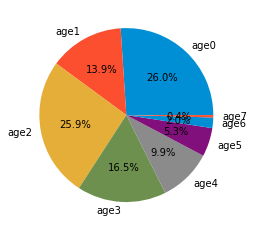

In [41]:
age_pi = [age0, age1, age2, age3, age4, age5, age6, age7]
age_pi_la = ['age0', 'age1', 'age2', 'age3', 'age4', 'age5', 'age6', 'age7']
plt.pie(age_pi, labels=age_pi_la, autopct='%.1f%%')
plt.show()

In [42]:
test = data.drop_duplicates(['HomePlanet'])
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,NumId,Age_band
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,0001,01,3
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,0002,01,2
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0007,01,0
12,0009_01,Mars,0.0,F/1/P,TRAPPIST-1e,32.0,0.0,73.0,0.0,1123.0,0.0,113.0,Berers Barne,1.0,0011,01,3


In [43]:
data["HomePlanet"].replace([False,True],[0,1],inplace=True)
data["HomePlanet"]

0       Europa
1        Earth
2       Europa
3       Europa
4        Earth
         ...  
8688    Europa
8689     Earth
8690     Earth
8691    Europa
8692    Europa
Name: HomePlanet, Length: 8213, dtype: object